In [1]:
import numpy as np
from math import sqrt
import random
import matplotlib.pyplot as plt
import os

### Dataset: Djibouti Tour
https://www.math.uwaterloo.ca/tsp/world/countries.html#DJ    
https://www.math.uwaterloo.ca/tsp/world/djtour.html    
Optimal Length is 6656

In [2]:
dj38 = []
with open('./dj38_data.txt', 'r') as f:
    data = f.read()
points = data.split('\n')
for p in points:
    a,b = map(float, p.split(' '))
    dj38.append([a,b])
CITIES = np.array(dj38)
INITIAL_CITY = CITIES[0]
CITIES_COUNT = 38
CITIES.shape

(38, 2)

### Dataset: Club estabilished cities 

In [12]:
c = []
with open('./club_data.txt', 'r') as f:
    data = f.read()
points = data.split('\n')
for p in points:
    a,b = map(int, p.split(' '))
    c.append([a,b])
CITIES = np.array(c, dtype='int32')
INITIAL_CITY = CITIES[0]
CITIES_COUNT = 40
CITIES.shape

(40, 2)

### Dataset: Random

In [9]:
CITIES_COUNT = 40
np.random.seed()

CITIES = np.random.randint(-9,10, size=(1,2))
while (CITIES.shape != (CITIES_COUNT,2)):
    n = np.random.randint(-9,10, size=(2,))
    if not any(np.equal(CITIES, n).all(1)):
        CITIES = np.append(CITIES, n.reshape(1,2), axis=0)     
        
INITIAL_CITY = CITIES[0]
CITIES.shape

(40, 2)
[[-9 -8]
 [-9 -3]
 [-9  1]
 [-9  4]
 [-9  7]
 [-8  5]
 [-7 -4]
 [-7 -3]
 [-7  5]
 [-7  6]
 [-6 -7]
 [-6  0]
 [-5  2]
 [-4 -6]
 [-4  0]
 [-3 -7]
 [-3  4]
 [-3  8]
 [-2  9]
 [-1  1]
 [-1  2]
 [-1  9]
 [ 0 -8]
 [ 1  3]
 [ 1  5]
 [ 2  0]
 [ 2  4]
 [ 3 -7]
 [ 3  0]
 [ 3  4]
 [ 4 -8]
 [ 4 -4]
 [ 4 -3]
 [ 4  3]
 [ 4  4]
 [ 5  1]
 [ 5  9]
 [ 6 -7]
 [ 6  2]
 [ 6  9]]


### Prints a sorted copy of cities

In [3]:
# Returns cities sorted 
a = CITIES.copy()
a = a[a[:,1].argsort()]
a = a[a[:,0].argsort(kind='mergesort')] #stable sort needed
print(a)

[[11003.6111 42102.5   ]
 [11108.6111 42373.8889]
 [11133.3333 42885.8333]
 [11155.8333 42712.5   ]
 [11183.3333 42933.3333]
 [11297.5    42853.3333]
 [11310.2778 42929.4444]
 [11416.6667 42983.3333]
 [11423.8889 43000.2778]
 [11438.3333 42057.2222]
 [11461.1111 43252.7778]
 [11485.5556 43187.2222]
 [11503.0556 42855.2778]
 [11511.3889 42106.3889]
 [11522.2222 42841.9444]
 [11569.4444 43136.6667]
 [11583.3333 43150.    ]
 [11595.     43148.0556]
 [11600.     43150.    ]
 [11690.5556 42686.6667]
 [11715.8333 41836.1111]
 [11751.1111 42814.4444]
 [11770.2778 42651.9444]
 [11785.2778 42884.4444]
 [11822.7778 42673.6111]
 [11846.9444 42660.5556]
 [11963.0556 43290.5556]
 [11973.0556 43026.1111]
 [12058.3333 42195.5556]
 [12149.4444 42477.5   ]
 [12286.9444 43355.5556]
 [12300.     42433.3333]
 [12355.8333 43156.3889]
 [12363.3333 43189.1667]
 [12372.7778 42711.3889]
 [12386.6667 43334.7222]
 [12421.6667 42895.5556]
 [12645.     42973.3333]]


## Variables

In [16]:
POPULATION_SIZE = 500
GENERATIONS = 2500
MUTATION_CHANCE = .2
NUM_REPORTS = 5
REPORT_EVERY_GEN = GENERATIONS // NUM_REPORTS

## Run genetic alg

In [17]:
routes = [Route() for i in range(POPULATION_SIZE)]
routes.sort(key=lambda x: x.f)

for generation in range(GENERATIONS):
    for i in range(0, len(routes)-2, 2):
        #print(f"Crossing {routes[i]} and {routes[i+1]}")
        r = Route.crossover(routes[i], routes[i+1])
        routes.append(r)

    routes.sort(key=lambda x: x.f)
    routes = routes[:POPULATION_SIZE]
    if(generation % REPORT_EVERY_GEN == 0):
        print(f"Generation {generation}: {routes[0].f:.5f}")
result = routes[0]

a,b = np.where(result.path[:,0] == INITIAL_CITY[0]), np.where(result.path[:,1] == INITIAL_CITY[1])
split = int(np.intersect1d(a,b))
path_ans = np.append(result.path[:split], result.path[split:], axis=0)
best_answer = Route(path_ans)
print(best_answer.path.shape)
#best_answer.path = np.append(result.path, result.path[0].reshape(1,2), axis=0)

Generation 0: 1753.09646
Generation 500: 547.08963
Generation 1000: 529.06811
Generation 1500: 518.60793
Generation 2000: 518.60793
(40, 2)


## Show Final Path

In [10]:
print(INITIAL_CITY)
print(best_answer)

[11003.6111 42102.5   ]
Route: [[11003.6111 42102.5   ]
 [11108.6111 42373.8889]
 [11155.8333 42712.5   ]
 [11297.5    42853.3333]
 [11310.2778 42929.4444]
 [11133.3333 42885.8333]
 [11183.3333 42933.3333]
 [11416.6667 42983.3333]
 [11423.8889 43000.2778]
 [11503.0556 42855.2778]
 [11522.2222 42841.9444]
 [11846.9444 42660.5556]
 [11822.7778 42673.6111]
 [11770.2778 42651.9444]
 [11690.5556 42686.6667]
 [11751.1111 42814.4444]
 [11785.2778 42884.4444]
 [11973.0556 43026.1111]
 [11595.     43148.0556]
 [11569.4444 43136.6667]
 [11583.3333 43150.    ]
 [11600.     43150.    ]
 [11485.5556 43187.2222]
 [11461.1111 43252.7778]
 [11963.0556 43290.5556]
 [12286.9444 43355.5556]
 [12386.6667 43334.7222]
 [12355.8333 43156.3889]
 [12363.3333 43189.1667]
 [12645.     42973.3333]
 [12421.6667 42895.5556]
 [12372.7778 42711.3889]
 [12149.4444 42477.5   ]
 [12300.     42433.3333]
 [12058.3333 42195.5556]
 [11715.8333 41836.1111]
 [11511.3889 42106.3889]
 [11438.3333 42057.2222]]; Fitness: 7367.669

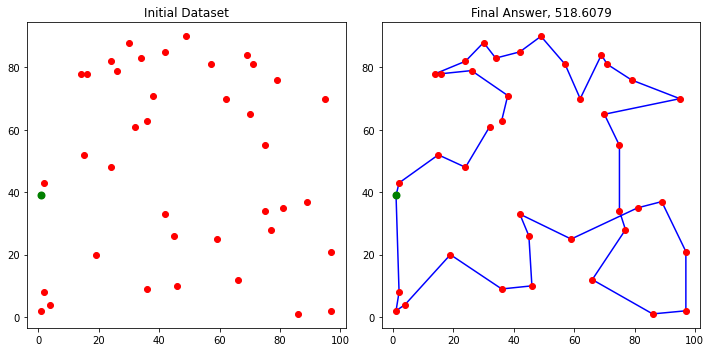

In [18]:
fig, [ax1,ax2] = plt.subplots(1,2, figsize=(10,5))
c = CITIES
s = best_answer.path
ax1.plot(c[:, 0], c[:, 1], marker='o', linewidth=0, color='red')
ax1.plot(INITIAL_CITY[0], INITIAL_CITY[1], marker='.', mew=3, ms=10, linewidth=0, color='green')
ax1.set(title='Initial Dataset')

ax2.plot(s[:, 0], s[:, 1], marker='o', color='b', mfc='r',mec='r')
ax2.plot(INITIAL_CITY[0], INITIAL_CITY[1], marker='.', mew=3, ms=10, linewidth=0, color='green')
ax2.set(title=f'Final Answer, {best_answer.f:.4f}')

fig.tight_layout()
plt.show()

## Route Definitions

In [7]:
class Route:
    def __init__(self, path=None):
        if path is not None:
            self.path = path #numpy int array of shape (CITIES_COUNT,2)
        else:
            p = CITIES.copy()
            np.random.shuffle(p)
            self.path = p 
        self.f = self.fitness() #float scalar 
        
    #not intended for external use 
    def fitness(self):
        shifted = np.append(self.path[1:], self.path[:1], axis=0)
        squared_comp = np.square((np.subtract(self.path,shifted)))
        out = np.sum(np.sqrt(np.sum(squared_comp,axis=1)))
        return out
            
    def __str__(self):
        return f"Route: {self.path}; Fitness: {self.f:.5f}"
    
    def __repr__(self):
        return f"Route at {hex(id(self))}; Fitness: {self.f:.5f}"

    # may be slow 
    @staticmethod 
    def crossover(p1, p2):
        a,b = np.random.randint(0,CITIES_COUNT, size=(2,), dtype='int32')
        p1_dna = np.array(p1.path[min(a,b):max(a,b)])
        # TODO find a faster way to do this
        missing_cities = np.array([city for city in p2.path if not any(np.equal(p1_dna, city).all(1))])
        #print(missing_cities.shape)
        if missing_cities.shape == (0,):
            print(p1_dna.shape)
            print(missing_cities)
            return Route(np.array(p1_dna)).mutate()
        out = Route(np.append(p1_dna, missing_cities, axis=0)).mutate()
        return out

    def mutate(self):
        if random.random() < MUTATION_CHANCE:
            a,b = np.random.randint(0,len(self.path), size=(2,), dtype='int32')
            t = self.path[a].copy()
            self.path[a] = self.path[b]
            self.path[b] = t
            self.f = self.fitness()
        return self
            